In [2]:
# This notebook covers EDA (Exploratory Data Analysis) as recommended at site:
# https://www.digitalocean.com/community/tutorials/exploratory-data-analysis-python

# library dependencies

import pandas as pd
import numpy as np
import seaborn as sns

# import matplotlib.pyplot as plt

In [3]:
# Load and view the data

file_path = "Resources/"
# file_name = "adult_c2.data"
file_name_id = "census_data.csv"

# input_file = file_path + file_name
input_file_id = file_path + file_name_id

# col_names_ori = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation",
#                  "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country",
#                  "income_grp"]

col_names_id = ["p_id", "age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation",
                "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country",
                "income"]

# https://stackoverflow.com/questions/15026698/how-to-make-separator-in-pandas-read-csv-more-flexible-wrt-whitespace-for-irreg
# df_census_income = pd.read_csv(input_file, header=None, names=col_names_ori, memory_map=True, skipinitialspace=True)

# https://jonathansoma.com/lede/foundations/classes/pandas%20columns%20and%20functions/fixing-column-names-in-pandas/
df_census_income = pd.read_csv(input_file_id,
                               skiprows=1,
                               names=col_names_id,
                               memory_map=True,
                               index_col=0,
                               skipinitialspace=True)

# df_census_income = pd.read_csv(input_file,
#                                header=None,
#                                names=col_names_ori,
#                                memory_map=True,
#                                skipinitialspace=True)

df_census_income.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
p_id,,,,,,,,,,,,,,,
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#Step 1 - Basic information

# View basic information about the dataset

df_census_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [5]:
# View data descriptive statistics

df_census_income.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
#Step 2 - Duplicate values

# Check for any duplicate values

df_census_income.duplicated().sum()

24

In [11]:
# Note: athough there are 24 duplicates, considering dataset this can be expected
# as income_grp column is already binned.

In [7]:
df_census_income[df_census_income.duplicated(keep=False) == True].sort_values("fnlwgt")

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
p_id,,,,,,,,,,,,,,,
28846,39,Private,30916,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
25624,39,Private,30916,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
21875,49,Private,31267,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
7920,49,Private,31267,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
22494,49,Self-emp-not-inc,43479,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
7053,49,Self-emp-not-inc,43479,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
2303,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [8]:
#Step 3 - Unique values in the data

# Find the unique data values of each column

df_census_income["age"].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [9]:
df_census_income["education"].sort_values().unique()

array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college'],
      dtype=object)

In [15]:
for col in df_census_income.columns:
    #print(f"Unique value(s) in column \'{col}\', dtype={df_census_income[col].dtype}:")
    print(f"Column \'{col}\' (dtype={df_census_income[col].dtype}) has {df_census_income[col].unique().shape[0]} unique values:")
    print(f"{df_census_income[col].sort_values().unique()}\n")

Column 'age' (dtype=int64) has 73 unique values:
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 90]

Column 'workclass' (dtype=object) has 9 unique values:
['?' 'Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay']

Column 'fnlwgt' (dtype=int64) has 21648 unique values:
[  12285   13769   14878 ... 1366120 1455435 1484705]

Column 'education' (dtype=object) has 16 unique values:
['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college']

Column 'education_num' (dtype=int64) has 16 unique values:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]

Column 'marital_status' (dtype=object) has 7 unique values:
['Divorced' 'Married-AF-spouse' 'Married-civ

<AxesSubplot:xlabel='count', ylabel='age'>

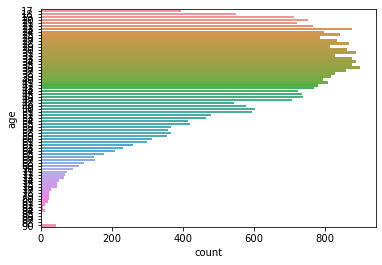

In [16]:
#Step 4 - Visualize the Unique counts

# Plot the unique values

sns.countplot(y=df_census_income["age"])

<AxesSubplot:xlabel='count', ylabel='workclass'>

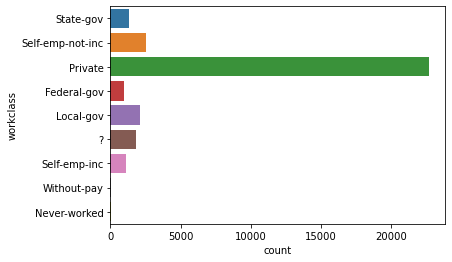

In [17]:
sns.countplot(y=df_census_income["workclass"])

<AxesSubplot:xlabel='count', ylabel='workclass'>

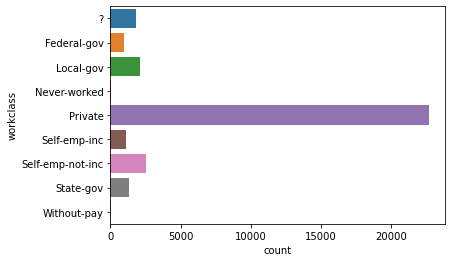

In [18]:
sns.countplot(y=df_census_income["workclass"].sort_values())

<AxesSubplot:xlabel='count', ylabel='education'>

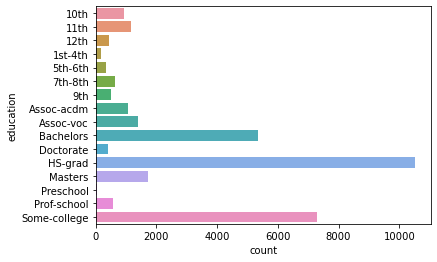

In [19]:
sns.countplot(y=df_census_income["education"].sort_values())

<AxesSubplot:xlabel='count', ylabel='education_num'>

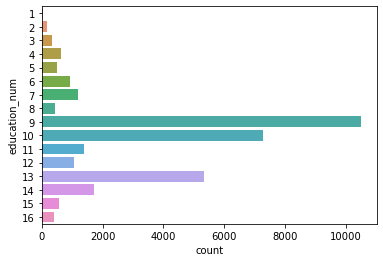

In [20]:
sns.countplot(y=df_census_income["education_num"])

<AxesSubplot:xlabel='count', ylabel='marital_status'>

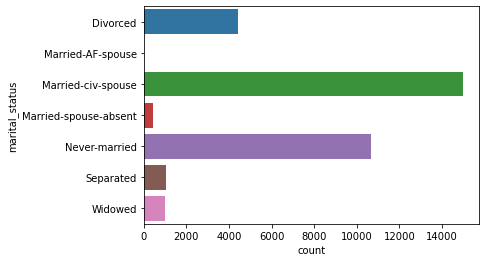

In [21]:
sns.countplot(y=df_census_income["marital_status"].sort_values())

<AxesSubplot:xlabel='count', ylabel='occupation'>

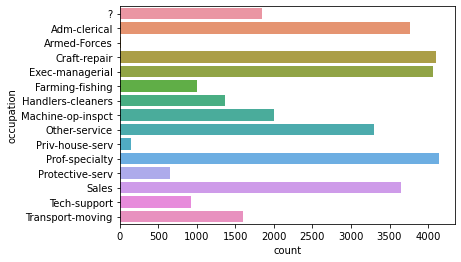

In [22]:
sns.countplot(y=df_census_income["occupation"].sort_values())

<AxesSubplot:xlabel='count', ylabel='relationship'>

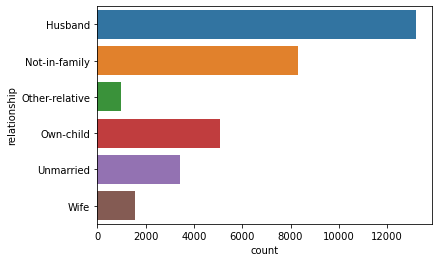

In [23]:
sns.countplot(y=df_census_income["relationship"].sort_values())

<AxesSubplot:xlabel='count', ylabel='race'>

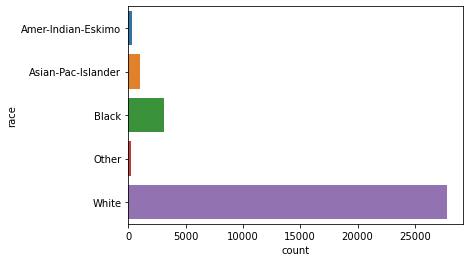

In [24]:
sns.countplot(y=df_census_income["race"].sort_values())

<AxesSubplot:xlabel='count', ylabel='sex'>

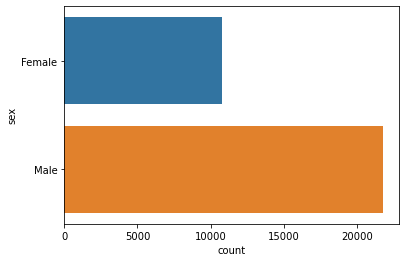

In [25]:
sns.countplot(y=df_census_income["sex"].sort_values())

<AxesSubplot:xlabel='capital_gain', ylabel='count'>

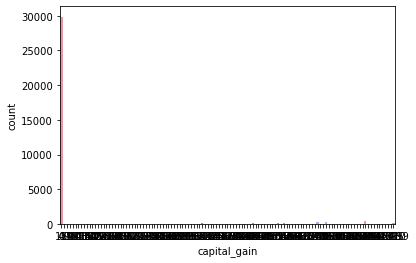

In [26]:
sns.countplot(x=df_census_income["capital_gain"].sort_values())

In [27]:
df_census_income["capital_gain"].value_counts().sort_index()

0        29849
114          6
401          2
594         34
914          8
         ...  
25236       11
27828       34
34095        5
41310        2
99999      159
Name: capital_gain, Length: 119, dtype: int64

<AxesSubplot:xlabel='capital_loss', ylabel='count'>

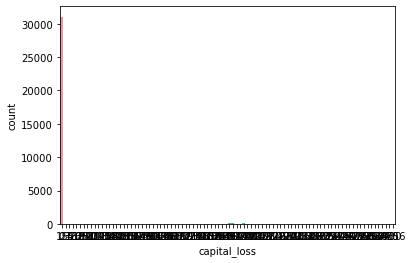

In [28]:
sns.countplot(x=df_census_income["capital_loss"].sort_values())

In [29]:
df_census_income["capital_loss"].value_counts().sort_index()

0       31042
155         1
213         4
323         3
419         3
        ...  
3004        2
3683        2
3770        2
3900        2
4356        3
Name: capital_loss, Length: 92, dtype: int64

<AxesSubplot:xlabel='count', ylabel='hours_per_week'>

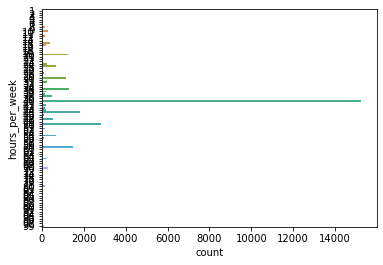

In [30]:
sns.countplot(y=df_census_income["hours_per_week"].sort_values())

In [31]:
df_census_income["hours_per_week"].value_counts().sort_index()

1     20
2     32
3     39
4     54
5     60
      ..
95     2
96     5
97     2
98    11
99    85
Name: hours_per_week, Length: 94, dtype: int64

<AxesSubplot:xlabel='count', ylabel='native_country'>

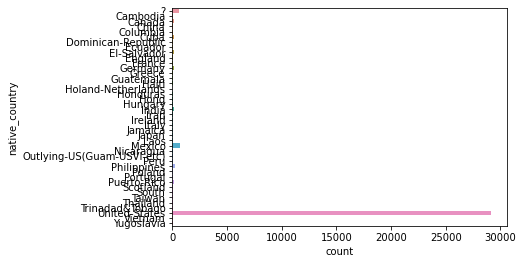

In [41]:
sns.countplot(y=df_census_income["native_country"].sort_values())

In [42]:
df_census_income["native_country"].value_counts().sort_index()

?                               583
Cambodia                         19
Canada                          121
China                            75
Columbia                         59
Cuba                             95
Dominican-Republic               70
Ecuador                          28
El-Salvador                     106
England                          90
France                           29
Germany                         137
Greece                           29
Guatemala                        64
Haiti                            44
Holand-Netherlands                1
Honduras                         13
Hong                             20
Hungary                          13
India                           100
Iran                             43
Ireland                          24
Italy                            73
Jamaica                          81
Japan                            62
Laos                             18
Mexico                          643
Nicaragua                   

In [43]:
df_census_income["native_country"].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

<AxesSubplot:xlabel='count', ylabel='income'>

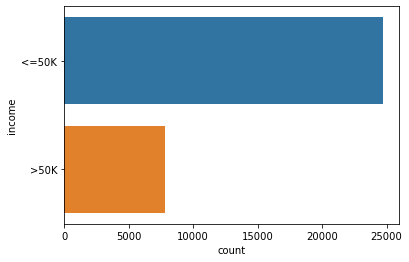

In [44]:
# sns.countplot(y=df_census_income["income_grp"].sort_values())
sns.countplot(y=df_census_income["income"].sort_values())

In [45]:
#Step 5 - Find the Null values
#"Finding the null values is the *most important* step in the EDA."

# Find null values

df_census_income.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [ ]:
# No nulls to be expected since data was pre-cleaned, with
# 'native_country' unknowns already changed to '?' values.

In [ ]:
#Step 6 - Replace the Null values

# Choose a replacement value appropriate for dtype to be replaced.
# Maybe change np.nan for 'int64' dtype to zero.
# For example, the following *would be* run to accomplish this ...
##df.replace(np.nan,'0',inplace=True)
#
# ... and then the changes rechecked ...
##df.isnull().sum()
#
# ... to see that all sums were zero (0).

# Quote from author of article- Prajwal CN- Developer and author
# at DigitalOcean: "I have used 0 to replace null values. You can
# opt for more meaningful methods such as mean or median."

In [46]:
#Step 7 - Know the datatypes

# Check datatypes

df_census_income.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [ ]:
#Step 8 - Filter the Data

# Filter the data based on some logic ...

In [47]:
# search_text = b"b' United-States'"
search_text = "United-States"

df_census_income[df_census_income["native_country"] == search_text].head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
p_id,,,,,,,,,,,,,,,
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [5]:
# ## Commenting-out this code block- was for selecting column after discovered there
# ## was a space before the string values; before looking up 'skipinitialspace=True'
# ## option when loading (and viewing) the data file.

# # mask_country = df_census_income.loc[:, "native_country"]
# # mask_country = df_census_income["native_country"].astype(str) == b"b' United-States'"
# # mask_country = df_census_income["native_country"].astype(str) == " United-States"
# mask_country = df_census_income["native_country"].astype(str) == "United-States"

# df_census_income_masked = df_census_income[mask_country].copy()

# df_census_income_masked.head()

# print(df_census_income["native_country"].value_counts())

# print(type(mask_country))

# mask_country.value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

False    32561
Name: native_country, dtype: int64

In [48]:
df_census_income.columns.to_list()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income']

In [49]:
df_census_income.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [8]:
# ## Commenting-out this code block also- like one above, was (an attempt here) to
# ## select column before looked up 'skipinitialspace=True' option to load/view file.

# # df_census_income["native_country"] = df_census_income["native_country"].astype('|S')
# df_census_income["native_country"] = df_census_income["native_country"].astype(str)

# df_census_income.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income_grp        object
dtype: object

In [9]:
# ## Same comment as for code cell block above.

# df_census_income[df_census_income["native_country"] == " United-States"]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_grp


In [50]:
df_census_income["age"].value_counts().sort_index()

17    395
18    550
19    712
20    753
21    720
     ... 
85      3
86      1
87      1
88      3
90     43
Name: age, Length: 73, dtype: int64

In [51]:
df_census_income[df_census_income["education_num"] == 1]["native_country"].value_counts()

United-States         17
Mexico                17
El-Salvador            4
Dominican-Republic     2
China                  2
Cambodia               1
Philippines            1
?                      1
India                  1
Nicaragua              1
Laos                   1
Hong                   1
Guatemala              1
Puerto-Rico            1
Name: native_country, dtype: int64

In [52]:
df_census_income[["education", "education_num"]].value_counts()

education     education_num
HS-grad       9                10501
Some-college  10                7291
Bachelors     13                5355
Masters       14                1723
Assoc-voc     11                1382
11th          7                 1175
Assoc-acdm    12                1067
10th          6                  933
7th-8th       4                  646
Prof-school   15                 576
9th           5                  514
12th          8                  433
Doctorate     16                 413
5th-6th       3                  333
1st-4th       2                  168
Preschool     1                   51
dtype: int64

In [53]:
df_census_income[["education_num", "education"]].value_counts().sort_index()

education_num  education   
1              Preschool          51
2              1st-4th           168
3              5th-6th           333
4              7th-8th           646
5              9th               514
6              10th              933
7              11th             1175
8              12th              433
9              HS-grad         10501
10             Some-college     7291
11             Assoc-voc        1382
12             Assoc-acdm       1067
13             Bachelors        5355
14             Masters          1723
15             Prof-school       576
16             Doctorate         413
dtype: int64

In [54]:
# for lev in df_census_income["education"].columns():
#     print(f"{df_census_income[lev]} has {df_census_income[lev].value_counts()} records.")

df_census_income[df_census_income["education_num"] > 8]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
p_id,,,,,,,,,,,,,,,
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [25]:
# df_census_income["capital_gain"].value_counts().sort_index()

0        29849
114          6
401          2
594         34
914          8
         ...  
25236       11
27828       34
34095        5
41310        2
99999      159
Name: capital_gain, Length: 119, dtype: int64

In [ ]:
# dfci =  df_census_income.copy()

In [ ]:
# dfci[]

In [55]:
print(df_census_income[df_census_income["education_num"] == 1]["native_country"].value_counts())

United-States         17
Mexico                17
El-Salvador            4
Dominican-Republic     2
China                  2
Cambodia               1
Philippines            1
?                      1
India                  1
Nicaragua              1
Laos                   1
Hong                   1
Guatemala              1
Puerto-Rico            1
Name: native_country, dtype: int64


In [56]:
test = lambda x : print(x) or x**x

In [57]:
test(2)

2


4

In [58]:
print_df_ed = \
    lambda df, x : print(f'{df[df["education_num"] == x]["education"].unique()}:\n{df[df["education_num"] == x]["native_country"].value_counts()}\n')

In [59]:
for i in df_census_income["education_num"].sort_values().unique():
    print_df_ed(df_census_income, i)

['Preschool']:
United-States         17
Mexico                17
El-Salvador            4
Dominican-Republic     2
China                  2
Cambodia               1
Philippines            1
?                      1
India                  1
Nicaragua              1
Laos                   1
Hong                   1
Guatemala              1
Puerto-Rico            1
Name: native_country, dtype: int64

['1st-4th']:
Mexico                64
United-States         46
El-Salvador           10
Guatemala              9
Portugal               7
Dominican-Republic     6
?                      5
Italy                  4
Cuba                   3
Puerto-Rico            3
Philippines            2
Vietnam                2
Poland                 1
Honduras               1
Ecuador                1
Cambodia               1
Haiti                  1
England                1
Columbia               1
Name: native_country, dtype: int64

['5th-6th']:
Mexico                148
United-States          97
El-Salvado

<AxesSubplot:>

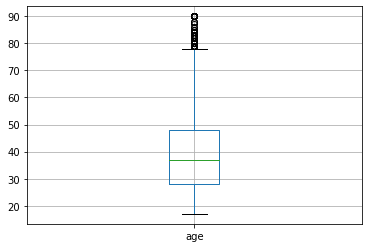

In [60]:
#Step 9 - A quick box plot
#"You can create a box plot for any numerical column using a single line of code."

# Boxplot

df_census_income[["age"]].boxplot()

<AxesSubplot:>

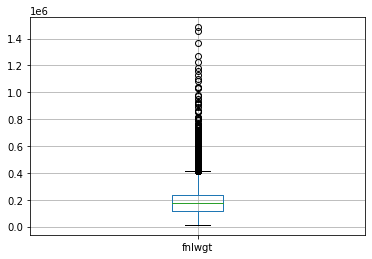

In [61]:
df_census_income[["fnlwgt"]].boxplot()

<AxesSubplot:>

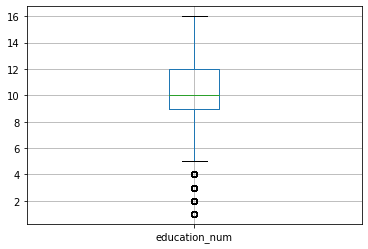

In [62]:
df_census_income[["education_num"]].boxplot()

<AxesSubplot:>

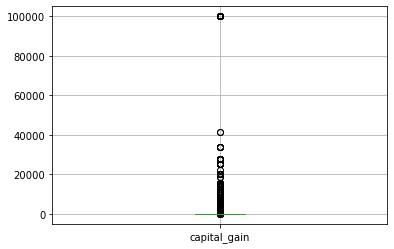

In [63]:
df_census_income[["capital_gain"]].boxplot()

<AxesSubplot:>

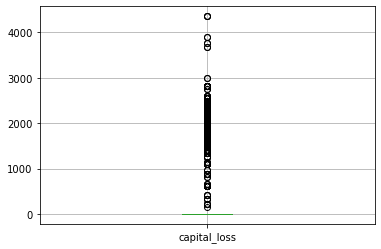

In [64]:
df_census_income[["capital_loss"]].boxplot()

<AxesSubplot:>

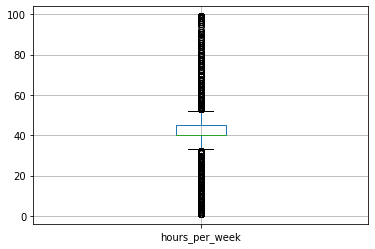

In [65]:
df_census_income[["hours_per_week"]].boxplot()

In [66]:
#Step 10 - Correlation Plot - EDA
#Can find "fair idea of the correlation strength between different variables."

# Correlation

df_census_income.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [ ]:
# if df_census_income["income_grp"] == ">50K":
#     df_census_income["income_lev"] = 1
# else:
#     df_census_income["income_lev"] = 0

# see code block below for using a lambda function instead ...

In [67]:
# Use lambda function to create new numerical column for a correlation

# https://www.geeksforgeeks.org/using-apply-in-pandas-lambda-functions-with-multiple-if-statements/
# Adding the "income_lev" column
# df_census_income["income_lev"] = df_census_income["income_grp"].apply(lambda x: 1 if x==">50K" else 0)
df_census_income["income_lev"] = df_census_income["income"].apply(lambda x: 1 if x==">50K" else 0)

In [68]:
# Rerun a correlation with new numerical column
df_census_income.corr()

# The correlation matrix ranges from +1 to -1; where +1 represents highly and
# positively correlated and -1 will be highly negatively correlated.

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_lev
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
income_lev,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


<AxesSubplot:>

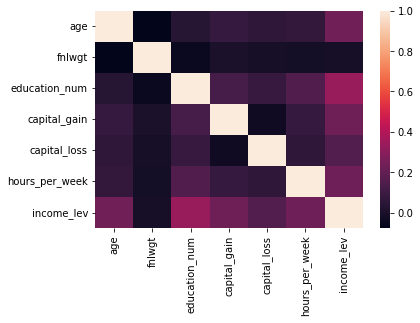

In [69]:
#"Visualize the correlation matrix usng *seaborn library* ...

# Correlation plot

sns.heatmap(df_census_income.corr())

In [70]:
df_census_income.head(15)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,income_lev
p_id,,,,,,,,,,,,,,,,
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1


In [71]:
# TO DO: Create function to bin 'education'/'education_num' into 'education_cat' column.

# ## This message: "apply will be slow for a large df" – EdChum Feb 15, 2016 at 16:52
# ## was noted at https://stackoverflow.com/questions/35414431/how-to-define-user-defined-function-in-pandas
#
# ## so decided to use map as at following website:
# ## https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63

education_num_map = {1:1, 2:1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:1, # Less than HS graduate
                     9:2,                                    # HS graduate
                     10:3, 11:3, 12:3,                       # Some college or associate's degree
                     13:4,                                   # Bachelor's degree
                     14:5, 15:5, 16:5}                       # Graduate or professional degree

education_label_1 = "Less than HS graduate"
education_label_2 = "HS graduate"
education_label_3 = "Some college or associate's degree"
education_label_4 = "Bachelor's degree"
education_label_5 = "Graduate or professional degree"

education_cat_map = {1: education_label_1, # Less than HS graduate
                     2: education_label_1,
                     3: education_label_1,
                     4: education_label_1,
                     5: education_label_1,
                     6: education_label_1,
                     7: education_label_1,
                     8: education_label_1,
                     9: education_label_2, # HS graduate
                     10: education_label_3, # Some college or associate's degree
                     11: education_label_3,
                     12: education_label_3,
                     13: education_label_4, # Bachelor's degree
                     14: education_label_5, # Graduate or professional degree
                     15: education_label_5,
                     16: education_label_5}

df_census_income["education_cat_lev"] = df_census_income["education_num"].map(education_num_map)   

df_census_income["education_cat"] = df_census_income["education_num"].map(education_cat_map)
    
# def get_education_category(x):
#     if 

# df_census_income["education_cat"].apply(get_)


df_census_income.head(50)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,income_lev,education_cat_lev,education_cat
p_id,,,,,,,,,,,,,,,,,,
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,4,Bachelor's degree
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,4,Bachelor's degree
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,2,HS graduate
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,1,Less than HS graduate
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,4,Bachelor's degree
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0,5,Graduate or professional degree
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0,1,Less than HS graduate
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1,2,HS graduate
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1,5,Graduate or professional degree


In [68]:
# mask_country = df_census_income.loc[:, "native_country"]
# mask_country = df_census_income["native_country"].astype(str) == b"b' United-States'"
# mask_country = df_census_income["native_country"].astype(str) == " United-States"
mask_country = df_census_income["native_country"].astype(str) == "United-States"

# df_census_income_masked = df_census_income[mask_country].copy()

# df_census_income_masked.head()

print(df_census_income["native_country"].value_counts())

# print(type(mask_country))

mask_country.value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

True     29170
False     3391
Name: native_country, dtype: int64

In [72]:
df_census_income = df_census_income.drop(columns=["education", "education_num", "income"])

In [73]:
out_file_name = "Resources/census_data_education.csv"

df_census_income.to_csv(out_file_name)